In [ ]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/hovernet_ALL/results.txt"

In [ ]:
file = open(file_path, "r")

In [ ]:
FileContent = file.read()
FileContent

'consep\nhiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii\nDetect #GPUS: 4\nUsing manual seed: 10\nDataset train: 8624\nDataset valid: 1176\nModel `  net ` pretrained path: ../dataset/pre_models/hovernet_original_consep_notype_tf2pytorch.tar\nMissing Variables: \n []\nDetected Unknown Variables: \n []\n----------------EPOCH 1\n------ train-loss_np_bce   : 0.01936\n------ train-loss_np_dice  : 0.07333\n------ train-loss_hv_mse   : 0.00414\n------ train-loss_hv_msge  : 0.10938\n------ train-overall_loss  : 0.20621\n------ train-lr-net        : 0.00010\n------ valid-np_acc   : 0.99363\n------ valid-np_dice  : 0.94837\n------ valid-hv_mse   : 0.00982\n----------------EPOCH 2\n------ train-loss_np_bce   : 0.01676\n------ train-loss_np_dice  : 0.05702\n------ train-loss_hv_mse   : 0.00362\n------ train-loss_hv_msge  : 0.10155\n------ train-overall_loss  : 0.17894\n------ train-lr-net        : 0.00010\n------ valid-np_acc   : 0.99414\n------ valid-np_dice  : 0.95161\n------ valid-hv_mse   : 0.00747\

In [ ]:
print("file_object is of type: ", type(FileContent))

file_object is of type:  <class 'str'>


In [ ]:

FileContentFiltered = list(filter(lambda x: len(x.split(':')) >= 2,FileContent.split('\n')))[7:]
FileContentMap = list(map(lambda x: float(x.split(':')[1]),FileContentFiltered))

In [ ]:
idx_to_str = {0:"Train NP BCE", 1: "Train NP DICE", 
              2: "Train NP MSE", 3: "Train HV MSGE",
              4: "Train overall loss", 5: "Valid NP accuracy", 
              6: "Valid NP DICE", 7: "Valid HV MSE"}

metrics_res = [[],[],[],[],[],[],[],[]]
offset = 0
for idx, x in enumerate(FileContentMap):
    if(idx % 9 == 5):
      offset += 1
      continue
    else:
      metrics_res[(idx - offset) % 8].append(x)




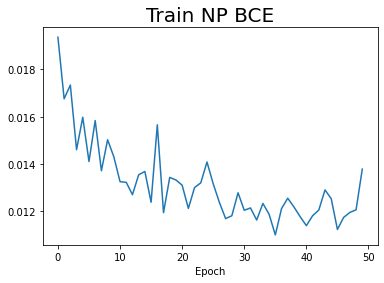

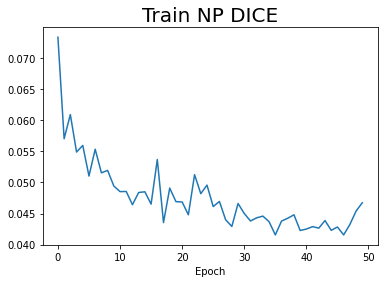

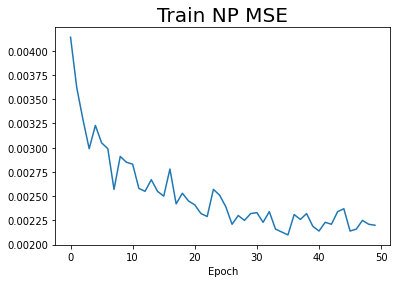

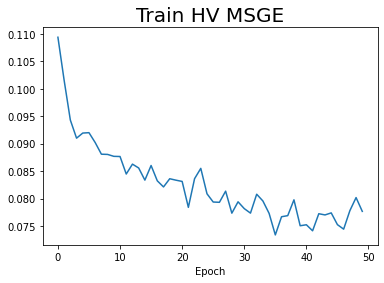

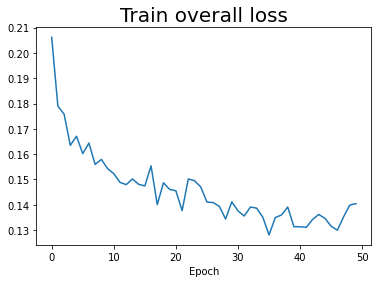

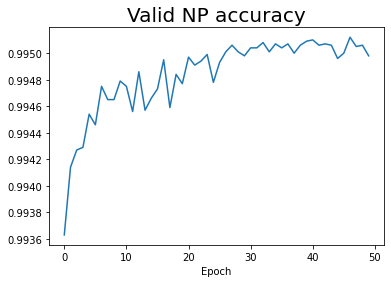

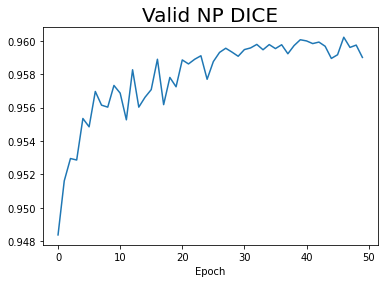

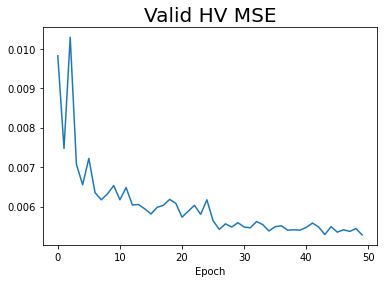

In [ ]:
for idx, y in enumerate(metrics_res):
  metric_name = idx_to_str[idx]
  plt.xlabel('Epoch')
  plt.title(metric_name,fontsize=20)
  plt.yticks()
  plt.plot(range(0,50), y)
  plt.show()